In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
df = pd.read_csv('data/diamond.csv')

df.head(5)

,cut,color,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
0,Fair,E,VS2,0.22,65.1,61.0,337,3.87,2.49,3.78
1,Fair,E,SI2,0.86,55.1,69.0,2757,6.45,3.52,6.33
2,Fair,F,SI2,0.96,66.3,62.0,2759,6.27,4.07,5.95
3,Fair,F,VS2,0.70,64.5,57.0,2762,5.57,3.58,5.53
4,Fair,F,VS2,0.70,65.3,55.0,2762,5.63,3.66,5.58


In [19]:
df.describe()


,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,3.538734,5.734526
std,0.474011,1.432621,2.234491,3989.439738,1.121761,0.705699,1.142135
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,2.910000,4.720000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,3.530000,5.710000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,4.040000,6.540000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,31.800000,58.900000


In [20]:
df = df.drop(columns=['cut', 'color', 'clarity'])
df.head()

,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
0,0.22,65.1,61.0,337,3.87,2.49,3.78
1,0.86,55.1,69.0,2757,6.45,3.52,6.33
2,0.96,66.3,62.0,2759,6.27,4.07,5.95
3,0.70,64.5,57.0,2762,5.57,3.58,5.53
4,0.70,65.3,55.0,2762,5.63,3.66,5.58


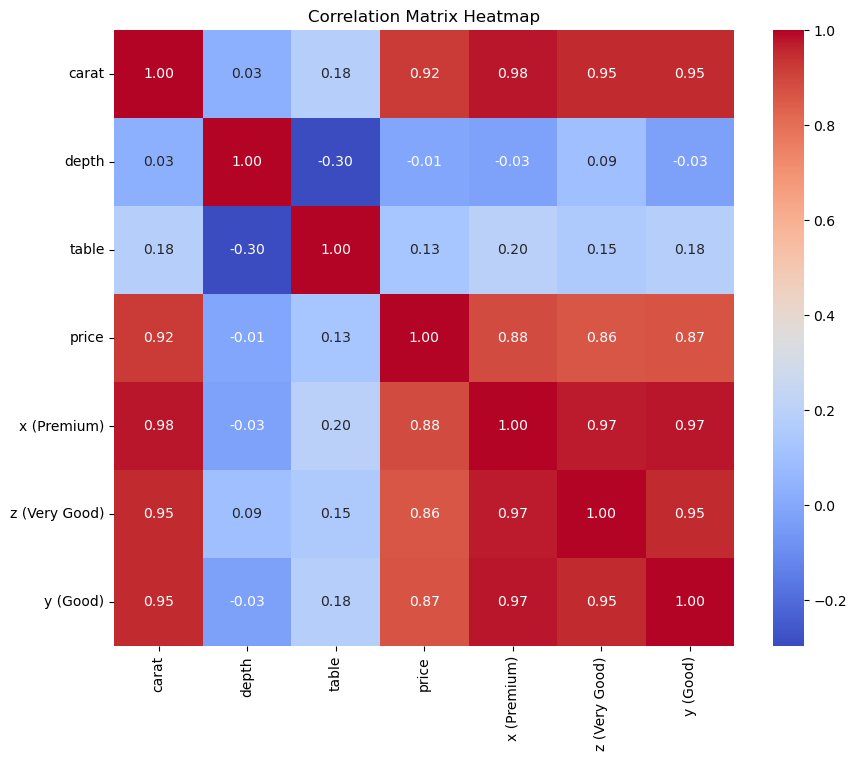

In [21]:
import seaborn as sns

# Compute the correlation matrix
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

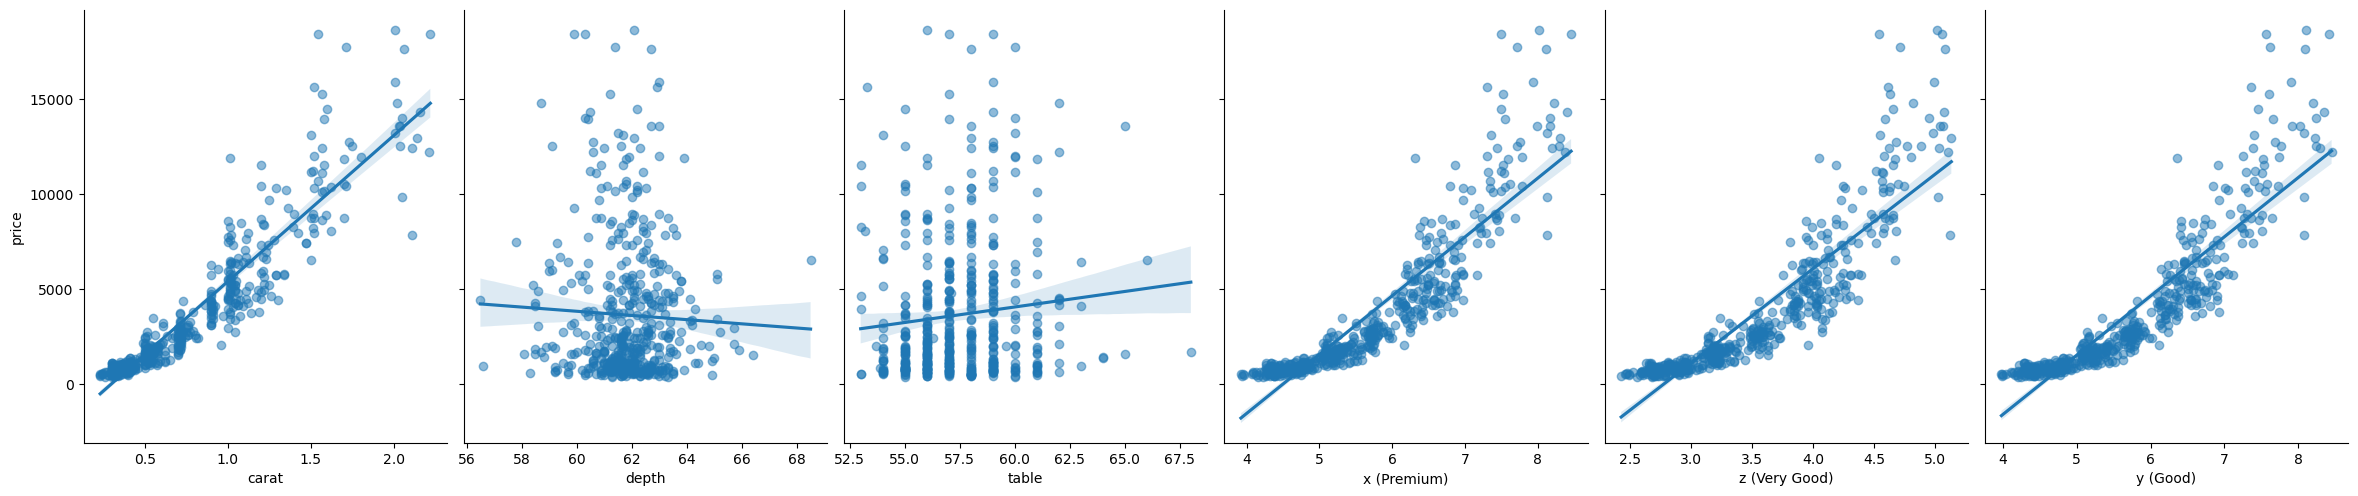

In [22]:
df_sample = df.sample(n=500, random_state=42)  # Adjust n to your preferred sample size
sns.pairplot(df_sample, x_vars=df_sample.columns.drop('price'), y_vars='price', height=5, aspect=0.8, kind='reg', plot_kws={'scatter_kws': {'alpha': 0.5}})
plt.show()

In [23]:
df = (df - df.mean()) / df.std(ddof=1)

df.describe()

,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
count,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04
mean,-8.430615e-18,5.930147e-15,3.266863e-15,-6.744492e-17,-5.058369e-16,4.215307e-16,-3.372246e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.261446e+00,-1.308748e+01,-6.470013e+00,-9.040868e-01,-5.109073e+00,-5.014510e+00,-5.020884e+00
25%,-8.395154e-01,-5.231005e-01,-6.521325e-01,-7.476738e-01,-9.103164e-01,-8.909378e-01,-8.882717e-01
50%,-2.066190e-01,3.531645e-02,-2.046032e-01,-3.839636e-01,-2.777527e-02,-1.237607e-02,-2.147379e-02
75%,5.106635e-01,5.239313e-01,6.904554e-01,3.487834e-01,7.210475e-01,7.103118e-01,7.052356e-01
max,8.885992e+00,1.204128e+01,1.680151e+01,3.732404e+00,4.465161e+00,4.004720e+01,4.654922e+01


# Histograms for features:
 

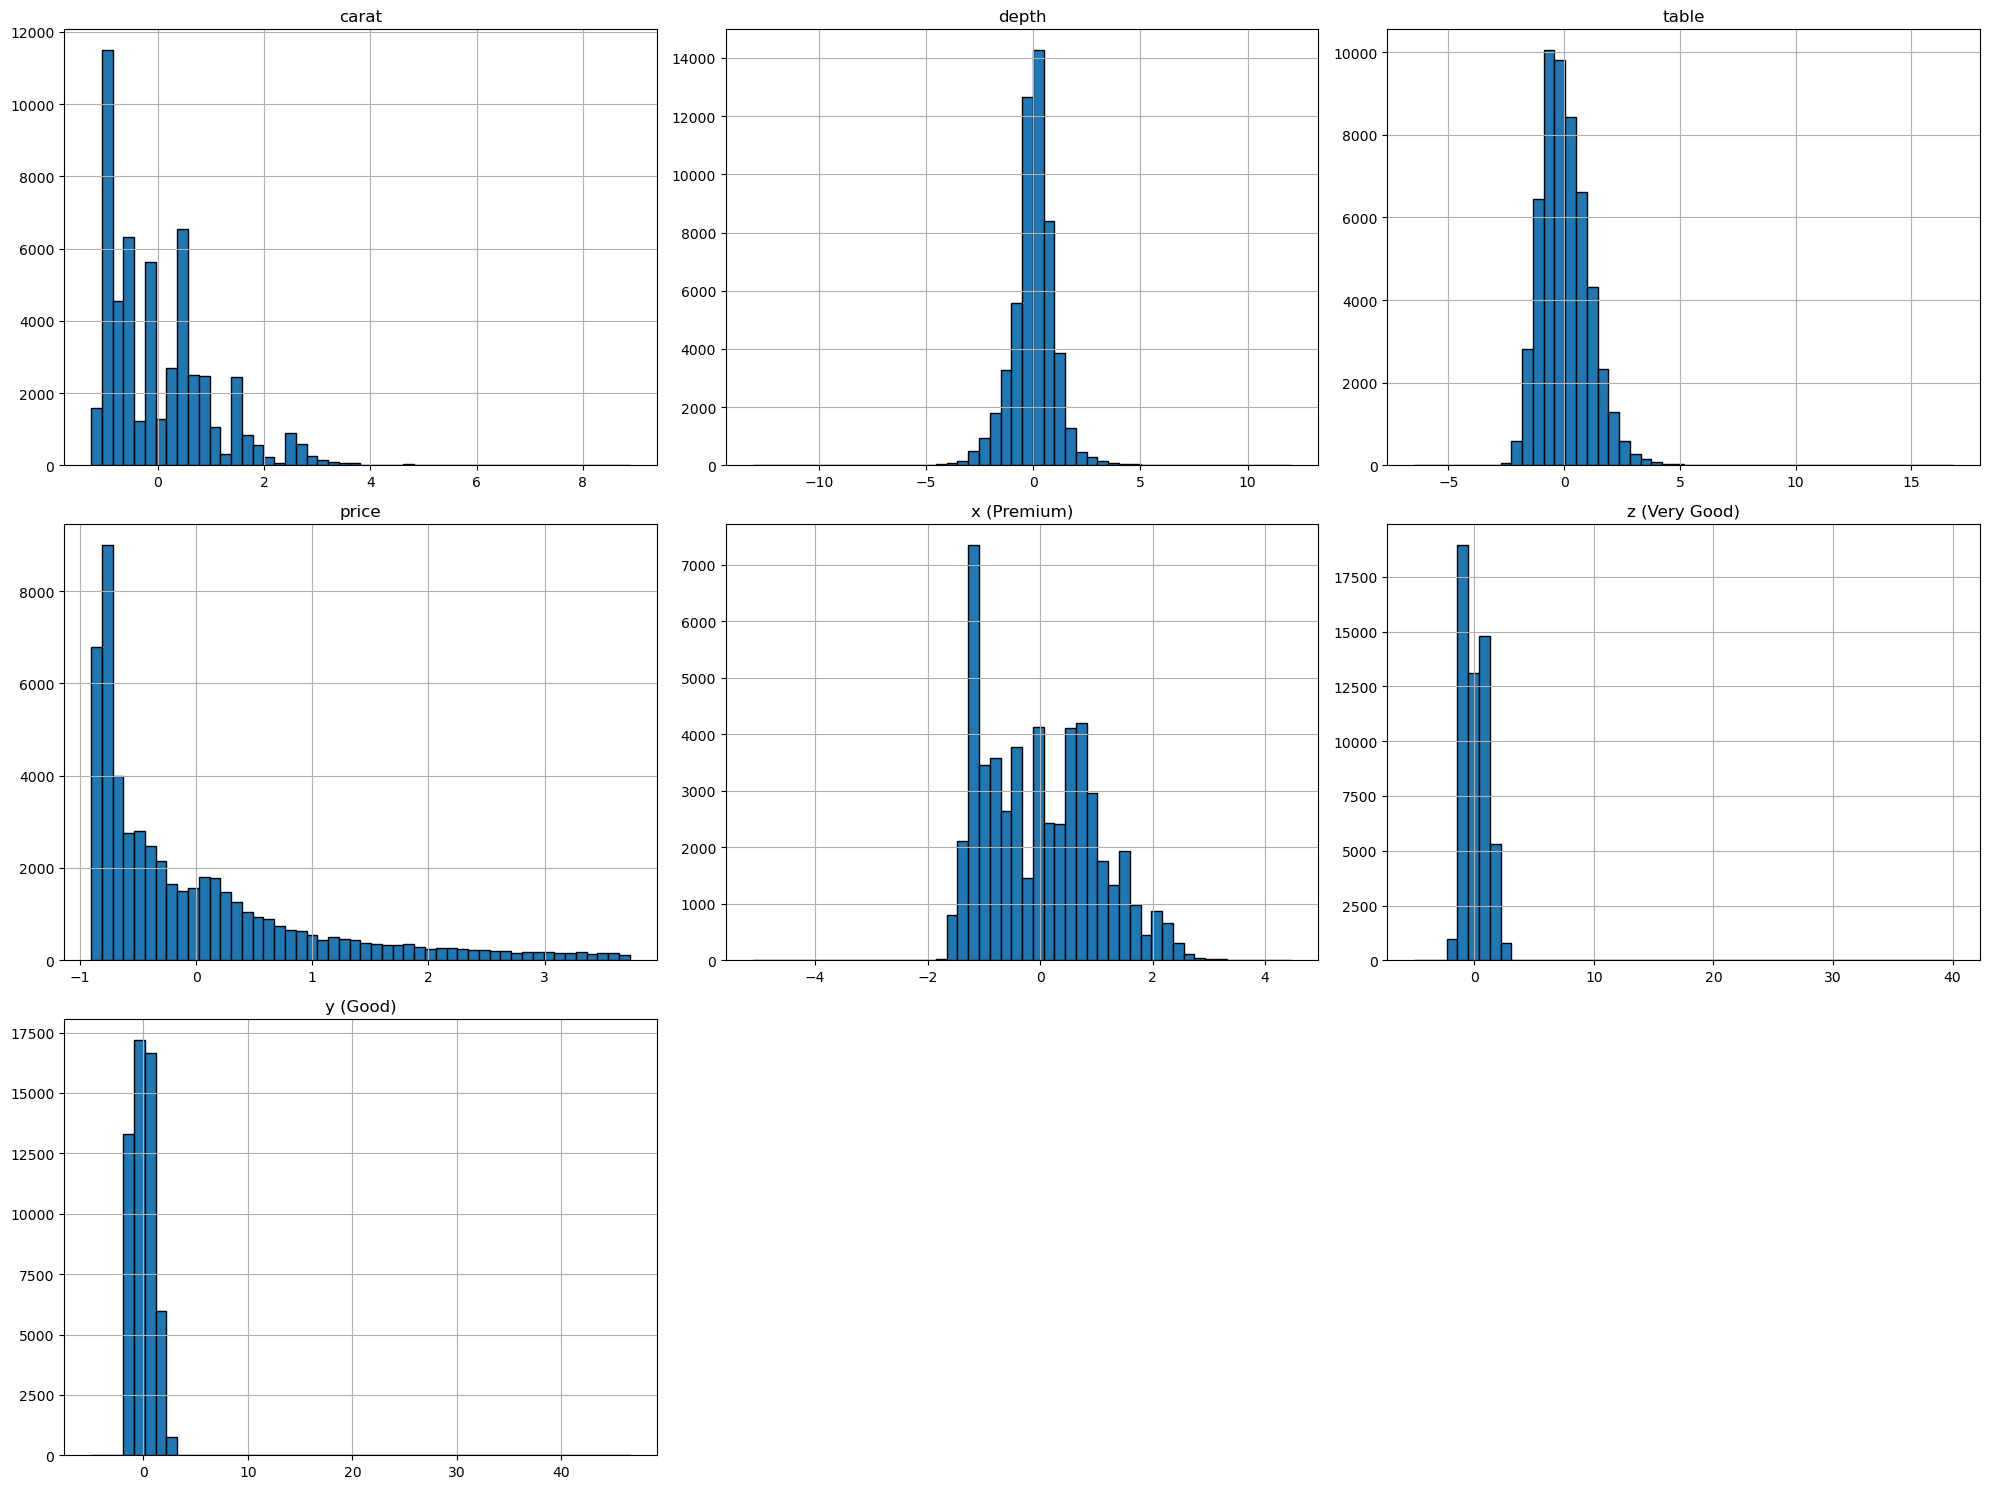

In [24]:

# Create histograms of all features in the dataframe
df.hist(figsize=(20, 15), bins=50, edgecolor='black')
plt.tight_layout()
plt.show()

In [ ]:
X = df.drop(columns=['price']).values


In [26]:
from scipy.linalg import svd 

N, M = X.shape

U, S, Vh = svd(X, full_matrices=False) #NOTE: Change to Vh

# Compute variance explained by principal components
rho = (S * S) / (S * S).sum()

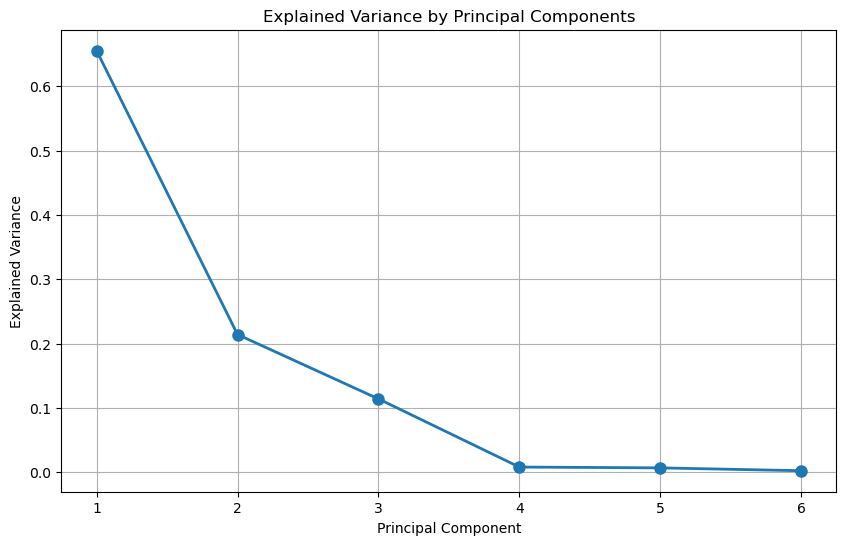

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rho) + 1), rho, 'o-', linewidth=2, markersize=8)
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

# PCA



## The pricnial directions of the condsiderd PCA compoentnts:



## The amount of variance explained as a function of the number of Pca Componments included.

## The data projected onto the considered prinicipal component 